In [2]:
import os
os.getcwd()

# Change directory to main repository directory in order to install modules
os.chdir(f"{os.environ['HOME']}/Code/continunet-training/")

In [3]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt

from continunet.network.unet import Unet

2024-07-05 15:44:23.994299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-05 15:44:24.017162: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-05 15:44:24.017184: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-05 15:44:24.032891: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-05 15:44:25.403330: W tensorflow/compiler/tf

In [4]:
# Check for GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
train_file = "train.npy"
test_file = "test.npy"
validation_file = "validation.npy"

In [6]:
def load_arrays(file):
    """"""
    return np.load(file, allow_pickle=True)

train_arrays = load_arrays(train_file)
validation_arrays = load_arrays(validation_file)
test_arrays = load_arrays(test_file)

In [7]:
def normalise_image(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))


def load_data(data, normalise=True):
    data_images = data[0]
    map_images = data[1]
    information = data[2]

    if normalise:
        image_data = np.array(list(map(normalise_image, data_images)))
    else:
        image_data = np.asarray([image for image in data_images], dtype=np.float32)
        
    map_data = np.asarray([image for image in map_images], dtype=np.float32)

    for segmentation_map in map_data:
        segmentation_map[segmentation_map > 1] = 1

    return image_data, map_data, information

train_data, train_maps, train_information = load_data(train_arrays)
validation_data, validation_maps, validation_information = load_data(validation_arrays)
test_data, test_maps, test_information = load_data(test_arrays)



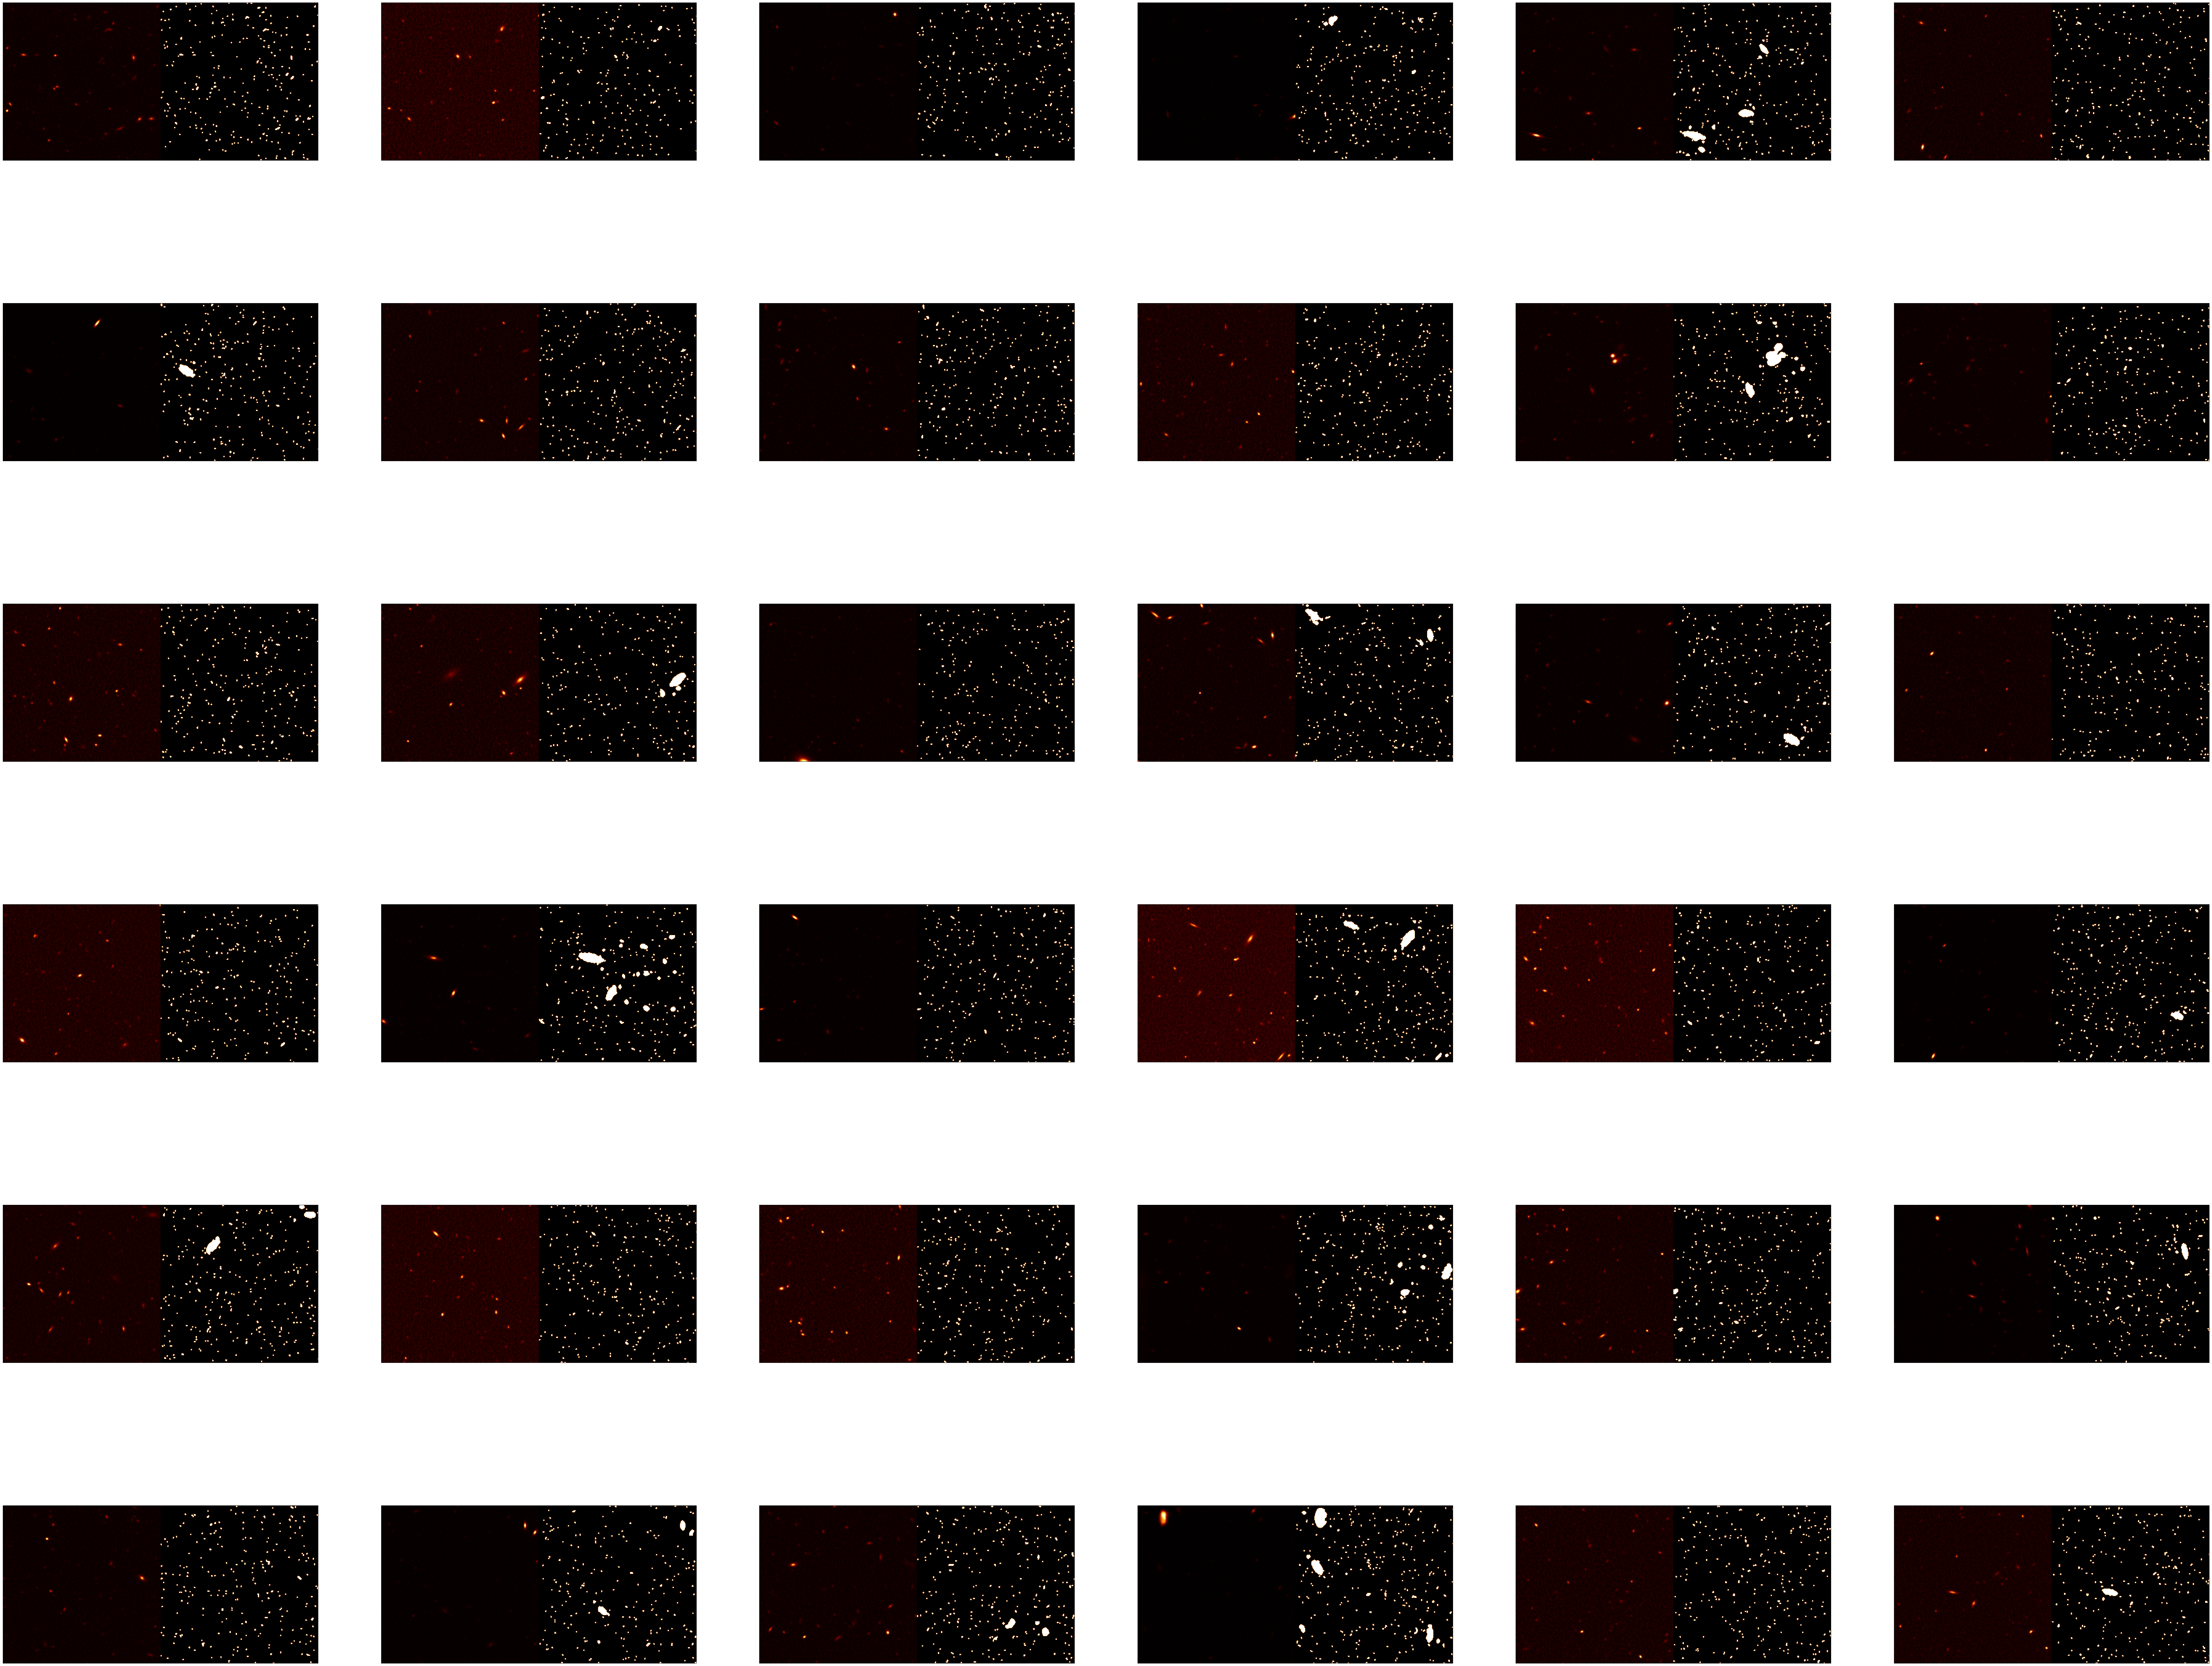

In [8]:
size = 6

fig, axs = plt.subplots(size, size,figsize=(100, 80))

count = 700
for i in range(size):
    for j in range(size):
        
        axs[i, j].imshow(np.concatenate((train_data[count], train_maps[count]), axis = -1), cmap="afmhot")
        axs[i, j].get_xaxis().set_visible(False)
        axs[i, j].get_yaxis().set_visible(False)
        count += 1



In [9]:
data_train = np.reshape(train_data, (len(train_data), 256, 256, 1))
data_validation = np.reshape(validation_data, (len(validation_data), 256, 256, 1))
data_test = np.reshape(test_data, (len(test_data), 256, 256, 1))
map_train = np.reshape(train_maps, (len(train_maps), 256, 256, 1))
map_validation = np.reshape(validation_maps, (len(validation_maps), 256, 256, 1))
map_test = np.reshape(test_maps, (len(test_maps), 256, 256, 1))

In [11]:
unet_model = Unet((256, 256, 1))

InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version